In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv("Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.duplicated().sum()

5268

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Để làm được cohort: 
- Ngày khởi tạo giao dịch/ngày giao dịch/ ... 
- Người mua  

VD:
Người mua - ngày giao dịch  
Tú        | mua lần đầu vào 1/1/2024  ---> Lần GD đầu tiên  
Tú        | mua lần 2 vào 15/2/2024   ---> Lần GD thứ 2 - cách lần GD đầu tiên 1 tháng  
Tú        | mua lần 3 vào 20/3/2024   ---> Lần GD thứ 3 - cách lần GD đầu tiên 2 tháng  
Tú        | mua lần 4 vào 16/5/2024   ---> Lần GD thứ 4 - cách lần GD đầu tiên 4 tháng  
==> Xác định được ngày giao dịch đầu tiên  
==> Xác định người thời gian quay lại của người mua đó

In [7]:
df.dropna(subset=['CustomerID'],inplace=True)

In [8]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


In [10]:
df = df[(df['UnitPrice']>0)&(df['Quantity']>0)]

In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [12]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [13]:
df['CustomerID'] = df['CustomerID'].astype('int64')
df['CustomerID'] = df['CustomerID'].astype('object') ## Chuyển cột định danh Customer thành object cho cẩn thận

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  object 
 7   Country      392692 non-null  object 
 8   Revenue      392692 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 30.0+ MB


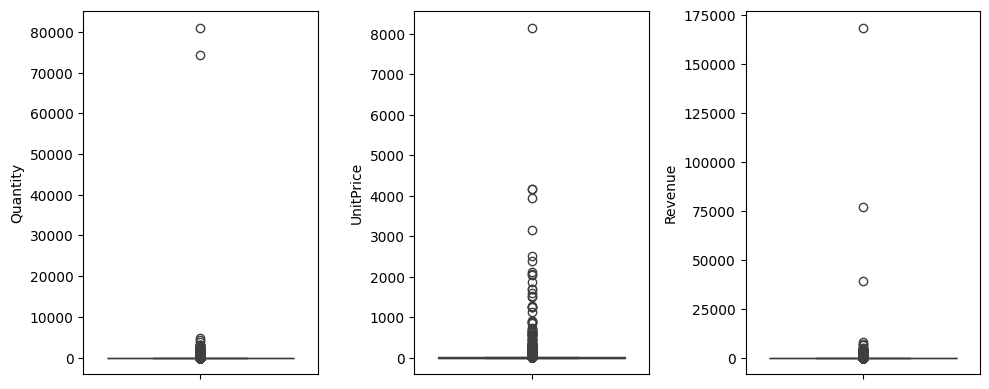

In [15]:
box_list = ['Quantity','UnitPrice','Revenue']

fig,axes = plt.subplots(1,3,figsize = (10,4))

for n,i in enumerate(box_list):
    sns.boxplot(data= df[i]
                ,ax = axes[n])
    
plt.tight_layout()
plt.show()

In [16]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = 'YYYY-mm-dd') #pd.to_datetime: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

### Bắt đầu làm cohort

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [23]:
df_min_invoice_date = df.groupby(by = 'CustomerID',as_index=False).agg(first_datetime = ('InvoiceDate','min'))
df_min_invoice_date['first_month'] = df_min_invoice_date['first_datetime'].dt.to_period('M')
df_min_invoice_date

,CustomerID,first_datetime,first_month
0,12346,2011-01-18 10:01:00,2011-01
1,12347,2010-12-07 14:57:00,2010-12
2,12348,2010-12-16 19:09:00,2010-12
3,12349,2011-11-21 09:51:00,2011-11
4,12350,2011-02-02 16:01:00,2011-02
...,...,...,...
4333,18280,2011-03-07 09:52:00,2011-03
4334,18281,2011-06-12 10:53:00,2011-06
4335,18282,2011-08-05 13:35:00,2011-08
4336,18283,2011-01-06 14:14:00,2011-01


In [26]:
df_count = df.groupby(by = 'CustomerID', as_index=False).agg(count = ('InvoiceNo','nunique')).sort_values(by = 'count', ascending = False)
df_count[df_count['count'] == 4]

,CustomerID,count
1339,14163,4
1342,14167,4
1741,14715,4
3639,17337,4
147,12530,4
...,...,...
2714,16045,4
2443,15669,4
1827,14842,4
1828,14844,4


In [31]:
df_pre_cohort = df.merge(df_min_invoice_date, on = 'CustomerID', how = 'inner')
df_pre_cohort['month_diff'] = (df_pre_cohort['InvoiceDate'].dt.year - df_pre_cohort['first_datetime'].dt.year) * 12 \
                      +  (df_pre_cohort['InvoiceDate'].dt.month - df_pre_cohort['first_datetime'].dt.month)
df_pre_cohort.sort_values(by = 'month_diff',ascending=False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,first_datetime,first_month,month_diff
377411,580127,22576,SWALLOW WOODEN CHRISTMAS DECORATION,12,2011-12-01 17:51:00,0.85,14911,EIRE,10.20,2010-12-01 14:05:00,2010-12,12
383052,580654,20713,JUMBO BAG OWLS,2,2011-12-05 13:37:00,2.08,15854,United Kingdom,4.16,2010-12-13 11:47:00,2010-12,12
383058,580654,22434,BALLOON PUMP WITH 10 BALLOONS,1,2011-12-05 13:37:00,1.95,15854,United Kingdom,1.95,2010-12-13 11:47:00,2010-12,12
383057,580654,23117,POPPY FIELDS CHOPPING BOARD,1,2011-12-05 13:37:00,4.95,15854,United Kingdom,4.95,2010-12-13 11:47:00,2010-12,12
383056,580654,23580,SNACK TRAY HAPPY FOREST,1,2011-12-05 13:37:00,1.95,15854,United Kingdom,1.95,2010-12-13 11:47:00,2010-12,12


In [33]:
df_cohort = df_pre_cohort.pivot_table(values='CustomerID'
                                    ,index='first_month'
                                    ,columns='month_diff'
                                    ,aggfunc='nunique')
df_cohort

month_diff,0,1,2,3,4,5,6,7,8,9,10,11,12
first_month,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


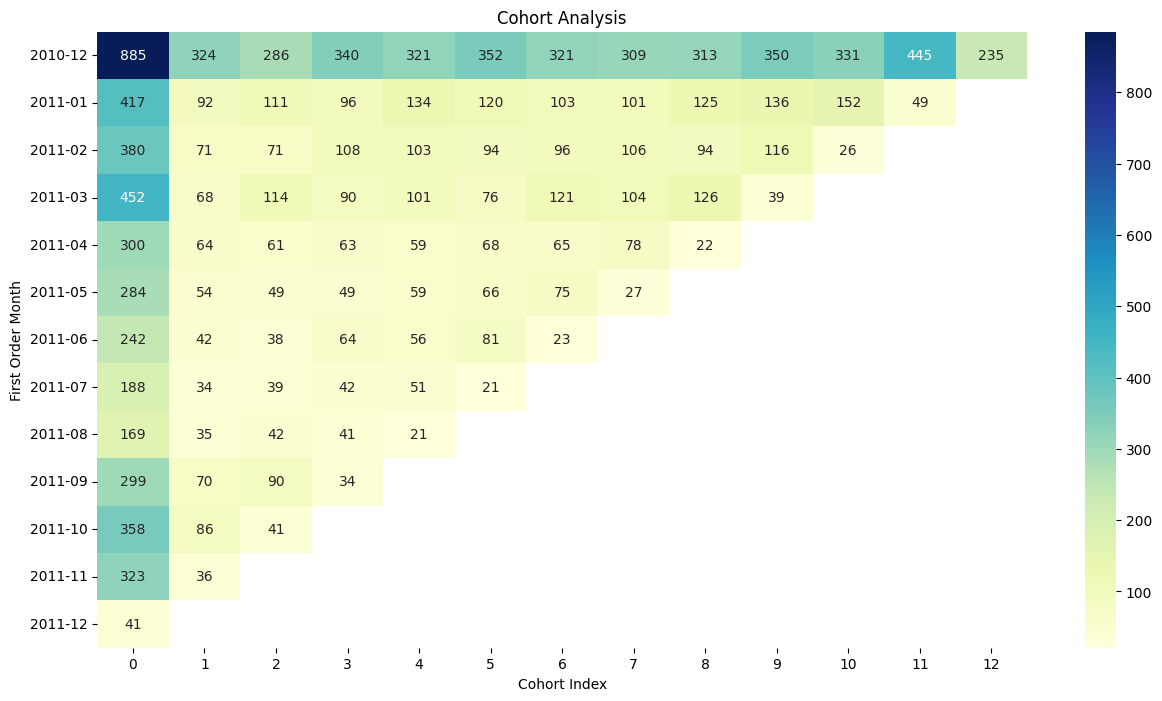

In [41]:
plt.figure(figsize= (15,8))
sns.heatmap(data = df_cohort
            ,annot=True
            ,cmap='YlGnBu'
            ,fmt = 'g'
            )

plt.xlabel('Cohort Index')
plt.ylabel('First Order Month')
plt.title('Cohort Analysis')

plt.show()

In [ ]:
cohort_size_monthly = df_cohort.iloc[:, 0]
retention_matrix_monthly = df_cohort.divide(cohort_size_monthly, axis=0)
retention_matrix_monthly

month_diff,0,1,2,3,4,5,6,7,8,9,10,11,12
first_month,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


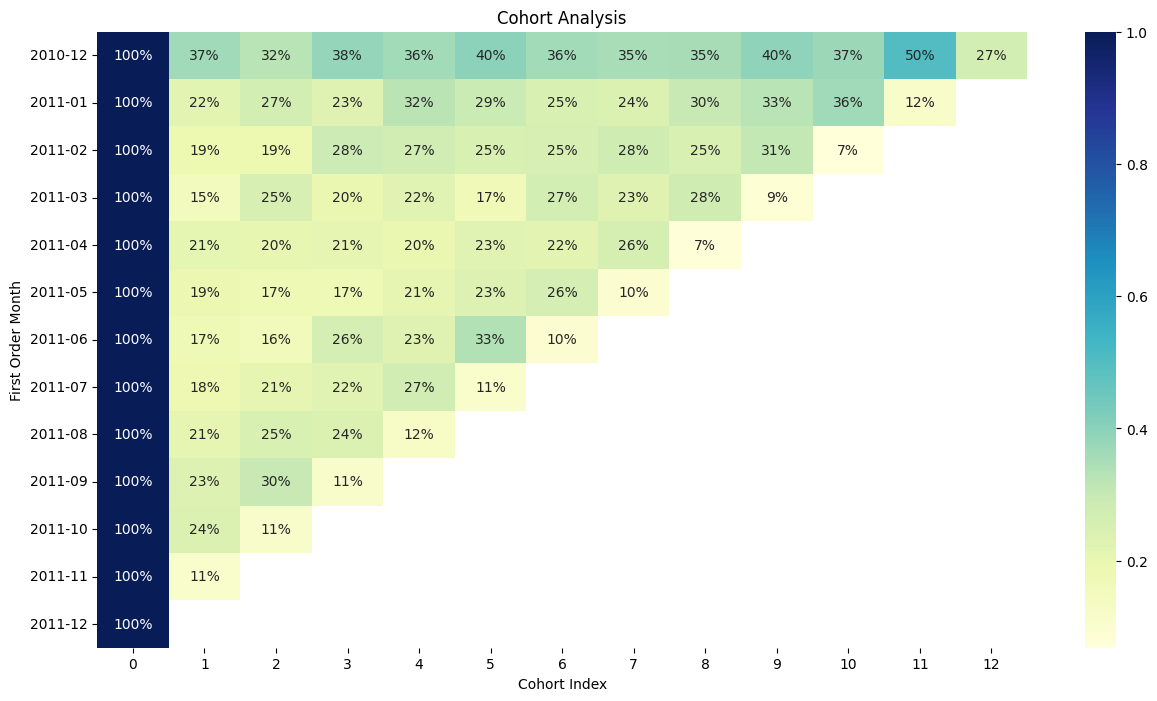

In [ ]:
plt.figure(figsize= (15,8))
sns.heatmap(data = retention_matrix_monthly
            ,annot=True
            ,cmap='YlGnBu'
            ,fmt = '.0%')

plt.xlabel('Cohort Index')
plt.ylabel('First Order Month')
plt.title('Cohort Analysis')

plt.show()

In [42]:
df_cohort_new = df_cohort
empty_column = pd.Series([0] * len(df_cohort_new), name='SLKH')
df_cohort_new.insert(loc=0, column='SLKH', value=empty_column)

cohort_size_monthly_new = df_cohort_new.iloc[:, 1]
retention_matrix_monthly_new = df_cohort_new.divide(cohort_size_monthly_new, axis=0)


In [43]:
retention_matrix_monthly_new

month_diff,SLKH,0,1,2,3,4,5,6,7,8,9,10,11,12
first_month,,,,,,,,,,,,,,
2010-12,NaN,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,NaN,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,NaN,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,NaN,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,NaN,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,NaN,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,NaN,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,NaN,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,NaN,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


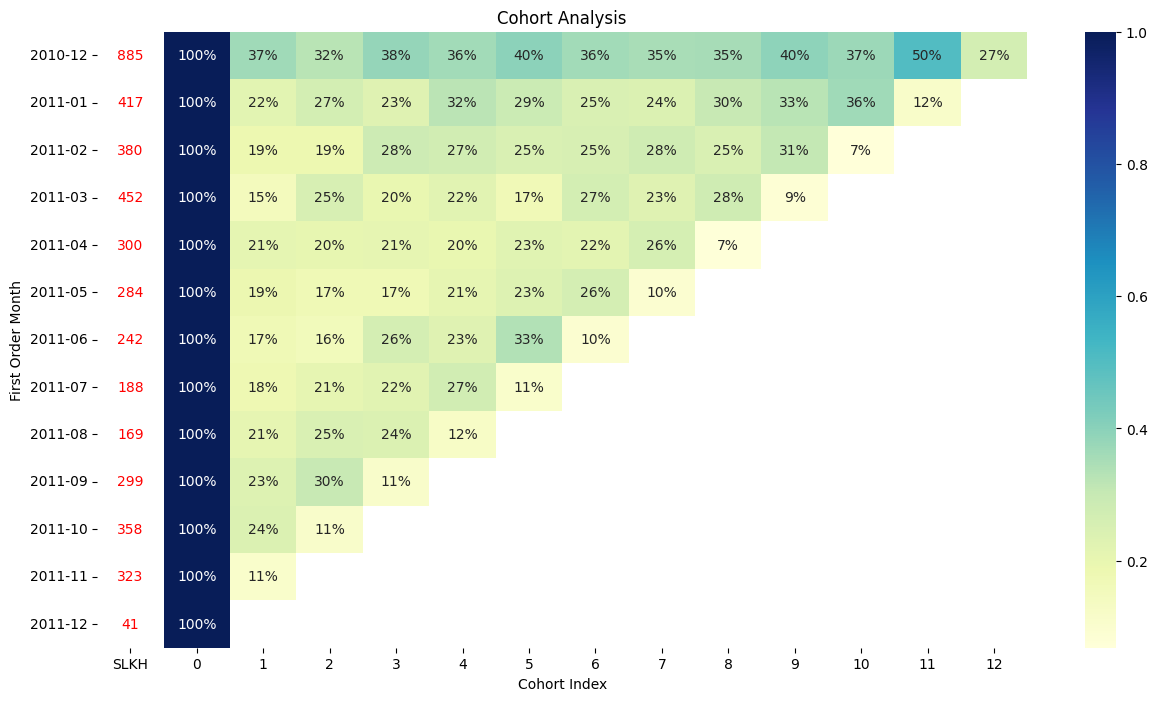

In [45]:
plt.figure(figsize= (15,8))
sns.heatmap(data = retention_matrix_monthly_new
            ,annot=True
            ,cmap='YlGnBu'
            ,fmt = '.0%')

for i in range(len(df_cohort)):
    plt.text(0.5, i + 0.5, '{:,.0f}'.format(df_cohort.iloc[i, 1])
            , ha='center'
            , va='center'
            , color = 'red')
    
plt.xlabel('Cohort Index')
plt.ylabel('First Order Month')
plt.title('Cohort Analysis')

plt.show()

Dưới đây là một số điểm nổi bật từ phân tích:

- Số lượng khách hàng ban đầu (SLKH): Các con số ở cột đầu tiên cho biết tổng số khách hàng trong từng tháng đầu tiên (ví dụ: tháng 12 năm 2010 có 885 khách hàng). Con số này giảm dần qua các tháng sau đó.

- Tỷ lệ duy trì khách hàng:

    + Mỗi ô tương ứng với một phần trăm khách hàng của Cohort tháng đó đã quay trở lại trong các tháng tiếp theo. Ví dụ, trong Cohort tháng 12 năm 2010, 37% khách hàng quay lại vào tháng thứ nhất, và đến tháng thứ 12 vẫn còn 27% khách hàng quay lại.

    + Tỷ lệ duy trì thường giảm dần theo thời gian, nhưng có một số tháng tỷ lệ tăng lên, chẳng hạn như Cohort tháng 7 năm 2011 có 33% khách hàng quay lại vào tháng thứ 4, cao hơn các tháng trước đó.

- Xu hướng chung: Nhìn chung, tỷ lệ duy trì khách hàng dần giảm qua thời gian, nhưng có một vài Cohort có sự duy trì ổn định hoặc tăng ở một vài thời điểm. Các màu đậm hơn (xanh đậm) thể hiện tỷ lệ duy trì cao hơn, trong khi các màu nhạt hơn (vàng nhạt) cho thấy tỷ lệ duy trì thấp hơn.